Visualizations are available at: https://colab.research.google.com/drive/1ejOmCYRBFf1YUxyKefgo2U5qQxTevMsw?usp=sharing

In [ ]:
import pandas as pd
import sys
import torch
import numpy as np

In [ ]:
# !unzip '/content/drive/MyDrive/Proj3.zip' -d '/content/drive/MyDrive/Colab Notebooks/Proj3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/train_transaction.csv')[['TransactionID','isFraud','TransactionAmt','TransactionDT','ProductCD','card1','card2','card3','card4','card5','addr1','addr2','dist1','card6','P_emaildomain','R_emaildomain']]

In [ ]:
df.shape

(590540, 16)

In [ ]:
df_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/train_identity.csv')[['TransactionID','DeviceType']]

It will be explained why I didn't keep other columns.

<h2>Preprocessing:<h2>

In [ ]:
df_id.shape

(144233, 2)

In [ ]:
df_id.columns

Index(['TransactionID', 'DeviceType'], dtype='object')

In [ ]:
sys.getsizeof(df) /1024 / 1024 / 1024

0.20478598400950432

In [ ]:
df.info

<bound method DataFrame.info of         TransactionID  isFraud  ...  P_emaildomain  R_emaildomain
0             2987000        0  ...            NaN            NaN
1             2987001        0  ...      gmail.com            NaN
2             2987002        0  ...    outlook.com            NaN
3             2987003        0  ...      yahoo.com            NaN
4             2987004        0  ...      gmail.com            NaN
...               ...      ...  ...            ...            ...
590535        3577535        0  ...            NaN            NaN
590536        3577536        0  ...      gmail.com            NaN
590537        3577537        0  ...      gmail.com            NaN
590538        3577538        0  ...        aol.com            NaN
590539        3577539        0  ...      gmail.com            NaN

[590540 rows x 16 columns]>

In [ ]:
df.isna().sum()

TransactionID          0
isFraud                0
TransactionAmt         0
TransactionDT          0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
addr1              65706
addr2              65706
dist1             352271
card6               1571
P_emaildomain      94456
R_emaildomain     453249
dtype: int64

In [ ]:
df_id.isna().sum()

TransactionID       0
DeviceType       3423
dtype: int64

In [ ]:
df.head(3)

,TransactionID,isFraud,TransactionAmt,TransactionDT,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,card6,P_emaildomain,R_emaildomain
0,2987000,0,68.5,86400,W,13926,NaN,150.0,discover,142.0,315.0,87.0,19.0,credit,NaN,NaN
1,2987001,0,29.0,86401,W,2755,404.0,150.0,mastercard,102.0,325.0,87.0,NaN,credit,gmail.com,NaN
2,2987002,0,59.0,86469,W,4663,490.0,150.0,visa,166.0,330.0,87.0,287.0,debit,outlook.com,NaN


In [ ]:
df_id.head(3)

,TransactionID,DeviceType
0,2987004,mobile
1,2987008,mobile
2,2987010,desktop


In [ ]:
len(np.intersect1d(df['TransactionID'],df_id['TransactionID']))

144233

In [ ]:
df_id['DeviceType'].unique()

array(['mobile', 'desktop', nan], dtype=object)

Outer join on both dataframes to have all rows.

In [ ]:
df = pd.merge(df,df_id,on='TransactionID',how='outer')

In [ ]:
#To free memory capacity
del df_id

In [ ]:
df.shape

(590540, 17)

Are not matched. So we have to join them on TransactionID

In [ ]:
df['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [ ]:
target = df['isFraud']

that is already normalized
cuz it's only 0,1

In [ ]:
df.drop(labels=['isFraud','TransactionID'],axis = 1,inplace = True)

In [ ]:
#One hot enocoding to transform categorical columns to numeric
df = pd.get_dummies(df)

In [ ]:
df.head(3)

,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,dist1,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,...,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,DeviceType_desktop,DeviceType_mobile
0,68.5,86400,13926,NaN,150.0,142.0,315.0,87.0,19.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.0,86401,2755,404.0,150.0,102.0,325.0,87.0,NaN,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,59.0,86469,4663,490.0,150.0,166.0,330.0,87.0,287.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Remove all null columns and fill other null values with the median of their belonging column.

In [ ]:
for c in df.columns:
  if df[c].isnull().sum() == len(df[c]):
    df.drop(labels = [c],axis = 1,inplace = True)
    continue

  df [c] = df[c].fillna(np.nanmedian(df[c]))


In [ ]:
df.head(3)

,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,dist1,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,...,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,DeviceType_desktop,DeviceType_mobile
0,68.5,86400,13926,361.0,150.0,142.0,315.0,87.0,19.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.0,86401,2755,404.0,150.0,102.0,325.0,87.0,8.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,59.0,86469,4663,490.0,150.0,166.0,330.0,87.0,287.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h4>Normalization:<h4>

In [ ]:
for c in df.columns:

  min = df[c].min()
  max = df[c].max()
  df[c] = ((df[c]-min)/max).astype('float32')

  #Again check whether there is null column
  if df[c].isnull().sum() == len(df[c]):
    df.drop(labels = [c],axis = 1,inplace = True)
  

In [ ]:
df.shape

(590540, 143)

In [ ]:
df.head(3)

,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,dist1,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,...,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,DeviceType_desktop,DeviceType_mobile
0,0.002137,0.000000e+00,0.702653,0.435000,0.21645,0.177215,0.398148,0.754902,0.001847,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000900,6.324658e-08,0.095401,0.506667,0.21645,0.008439,0.416667,0.754902,0.000778,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001840,4.364014e-06,0.199119,0.650000,0.21645,0.278481,0.425926,0.754902,0.027902,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sys.getsizeof(df)/1024/1024/1024 #in GB

0.3189902976155281

Size of df has been reduced in compare to the begining.

In [ ]:
length = df.shape[1]

In [ ]:
print([i for i in df.columns])

['TransactionAmt', 'TransactionDT', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W', 'card4_american express', 'card4_discover', 'card4_mastercard', 'card4_visa', 'card6_charge card', 'card6_credit', 'card6_debit', 'card6_debit or credit', 'P_emaildomain_aim.com', 'P_emaildomain_anonymous.com', 'P_emaildomain_aol.com', 'P_emaildomain_att.net', 'P_emaildomain_bellsouth.net', 'P_emaildomain_cableone.net', 'P_emaildomain_centurylink.net', 'P_emaildomain_cfl.rr.com', 'P_emaildomain_charter.net', 'P_emaildomain_comcast.net', 'P_emaildomain_cox.net', 'P_emaildomain_earthlink.net', 'P_emaildomain_embarqmail.com', 'P_emaildomain_frontier.com', 'P_emaildomain_frontiernet.net', 'P_emaildomain_gmail', 'P_emaildomain_gmail.com', 'P_emaildomain_gmx.de', 'P_emaildomain_hotmail.co.uk', 'P_emaildomain_hotmail.com', 'P_emaildomain_hotmail.de', 'P_emaildomain_hotmail.es', 'P_emaildomain_hotmail.fr', 'P_emaildomain_i

In [ ]:
df.isnull().sum()

TransactionAmt             0
TransactionDT              0
card1                      0
card2                      0
card3                      0
                          ..
R_emaildomain_yahoo.es     0
R_emaildomain_yahoo.fr     0
R_emaildomain_ymail.com    0
DeviceType_desktop         0
DeviceType_mobile          0
Length: 143, dtype: int64

As we expected there is no null value and also all data are normalized and transformed to [0,1].

<h2>Under Sampling:<h2>



There's an idea:


It seems there would be a pattern and compatibility among correct data but fraud must be outliers while having no pattern.
So in first phase, we train the network only with correct data and then try on fraud set.

Then we expect the loss value of correct data prediction would be far less than fraud loss value.

In [ ]:
import sklearn.model_selection as skm

Validation set is for after training.
Other set is going to be splitted to train and test sets while test is used in the training process.

In [ ]:
X_other,  X_valid ,y_other , y_valid = skm.train_test_split(df , target , test_size = 0.3)

In [ ]:
X_other.shape

(413378, 143)

In [ ]:
#For train
X_correct = torch.FloatTensor(X_other[y_other == 0].values)
y_correct = torch.FloatTensor(y_other[y_other == 0].values)

X_fraud = torch.FloatTensor(X_other[y_other == 1].values)
y_fraud = torch.FloatTensor(y_other[y_other == 1].values)

del X_other
del y_other

X_valid_corr = torch.FloatTensor(X_valid[y_valid == 0].values)
X_valid_fraud = torch.FloatTensor(X_valid[y_valid == 1].values)

In [ ]:
X_valid_fraud

tensor([[3.4764e-03, 8.0292e-01, 2.6158e-01,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [1.0509e-03, 9.7680e-02, 4.6929e-01,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [4.3677e-03, 2.3037e-01, 2.1793e-01,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        ...,
        [9.6971e-03, 2.6143e-01, 1.4144e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [7.6979e-04, 1.8143e-01, 5.5452e-01,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [9.0017e-04, 4.9655e-01, 4.6200e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [ ]:
len(X_valid_fraud)

6140

In [ ]:
len(X_correct)

398855

In [ ]:
X_train, X_test , y_train, y_test = skm.train_test_split(X_correct , y_correct , test_size = 0.5 )

In [ ]:
len(X_train)

199427

In [ ]:
y_train

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [ ]:
del df

In [ ]:
del X_correct
del y_correct

In [ ]:
import torch.utils.data as dt

In [ ]:
X_train[0][:10]

tensor([0.0016, 0.0269, 0.3979, 0.6267, 0.2165, 0.2785, 0.3037, 0.7549, 0.0008,
        0.0000])

In [ ]:
batch_size = 100

x_train_correct_dl = dt.DataLoader(X_train,batch_size=batch_size)
y_train_correct_dl = dt.DataLoader(y_train,batch_size=batch_size)

x_test_correct_dl = dt.DataLoader(X_test,batch_size=batch_size)
y_test_correct_dl = dt.DataLoader(y_test,batch_size=batch_size)


<h2>Create Model:<h2>

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, length):
        super().__init__()

        self.lin1 = nn.Linear(length,100) #143
        self.linb1 = nn.BatchNorm1d(100)
        self.lin2 = nn.Linear(100,60)
        self.linb2 = nn.BatchNorm1d(60)
        self.lin3 = nn.Linear(60,30)
        self.linb3 = nn.BatchNorm1d(30)
        self.lin4 = nn.Linear(30,15)
        self.lin45 = nn.Linear(15,6)
        self.linb4 = nn.BatchNorm1d(6)
        self.lin46 = nn.Linear(6,15)
        self.lin5 = nn.Linear(15,30)
        self.linb5 = nn.BatchNorm1d(30)
        self.lin6 = nn.Linear(30,60)
        self.lin7 = nn.Linear(60,100)
        self.linb6 = nn.BatchNorm1d(100)
        self.lin8 = nn.Linear(100,length)

        self.drop2 = nn.Dropout(0.03)

    def forward(self, data):
        x = F.relu(self.lin1(data))
        x = self.linb1(x)
        x = self.drop2(F.relu(self.lin2(x)))
        x = self.linb2(x)
        x = self.lin3(x)
        x= F.relu(x)
        x = self.linb3(x)
        x = self.drop2(x)
        x = F.relu(self.lin4(x))
        x = F.relu(self.lin45(x))
        x = self.linb4(x)
        x = F.relu(self.lin46(x))
        x = F.relu(self.lin5(x))
        x = self.linb5(x)
        x = self.drop2(x)
        x = F.relu(self.lin6(x))
        x = F.relu(self.lin7(x))
        x = self.linb6(x)
        x = self.lin8(x)
        # x = self.lin9(x)

        return x

def test(x):
  model.eval()
  # test_loss = 0
  # correct = 0
  with torch.no_grad():
    predicted = model(V(x))
    real = V(x)
    return loss(predicted , real ).item()


In [ ]:
import torch.optim
import collections

In [ ]:
model = AutoEncoder(length)

loss=nn.MSELoss()
learning_rate = 1e-2
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

print(model)

model_hist = collections.namedtuple('Model','epoch loss val_loss')
model_loss = model_hist(epoch = [], loss = [], val_loss = [])


AutoEncoder(
  (lin1): Linear(in_features=143, out_features=100, bias=True)
  (linb1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin2): Linear(in_features=100, out_features=60, bias=True)
  (linb2): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin3): Linear(in_features=60, out_features=30, bias=True)
  (linb3): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin4): Linear(in_features=30, out_features=15, bias=True)
  (lin45): Linear(in_features=15, out_features=6, bias=True)
  (linb4): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin46): Linear(in_features=6, out_features=15, bias=True)
  (lin5): Linear(in_features=15, out_features=30, bias=True)
  (linb5): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin6): Linear(in_features=30, out_features=60, bias=True)
  (lin7): Linear(in_features=60, out_feat

In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:
from torch.autograd import Variable as V

In [ ]:
x_train_correct_dl

In [ ]:
def train(epochs, model, model_loss):
    is_overfitted = int(0)
    last_val_loss = 1000 #For Early Stopping
    try: c = model_loss.epoch[-1]

    except: c = 0
    for epoch in tqdm_notebook(range(epochs),position=0, total = epochs):
        losses=[]
        dl = iter(x_train_correct_dl)
        for t in range(len(dl)):
            model.train()
          
            xt = next(dl)
            y_pred = model(V(xt))
            
            l = loss(y_pred,V(xt))
            losses.append(l)
            optimizer.zero_grad()

            l.backward()

            optimizer.step()

        losss= l.item()
        if (epoch+1) % 5 == 0:
              
          val_dl = iter(x_test_correct_dl)
          val_scores = [test(next(val_dl)) for i in range(len(val_dl))]

          model_loss.epoch.append(c+epoch)
          model_loss.loss.append(l.item())
          model_loss.val_loss.append(np.mean(val_scores))

          val_losss = np.mean(val_scores)

          #Check out loss for early stopping
          if val_losss > last_val_loss:
            is_overfitted +=1
          else:
            is_overfitted = 0
            
          last_val_loss = val_losss
          if is_overfitted == 3:
            print('Starts to overfitting!')
            break;

          print(f'Epoch: {epoch+1}   Loss: {losss:.4f}  Val_Loss on correct set: {val_losss:.4f}')

        else:
          print(f'Epoch: {epoch+1}   Loss: {losss:.4f}')

In [ ]:
epochs = 100

In [ ]:
train(model=model, epochs=epochs, model_loss=model_loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


Epoch: 1   Loss: 0.0061
Epoch: 2   Loss: 0.0060
Epoch: 3   Loss: 0.0067
Epoch: 4   Loss: 0.0062
Epoch: 5   Loss: 0.0069  Val_Loss on correct set: 0.0027
Epoch: 6   Loss: 0.0053
Epoch: 7   Loss: 0.0039
Epoch: 8   Loss: 0.0034
Epoch: 9   Loss: 0.0030
Epoch: 10   Loss: 0.0031  Val_Loss on correct set: 0.0014
Epoch: 11   Loss: 0.0045
Epoch: 12   Loss: 0.0037
Epoch: 13   Loss: 0.0037
Epoch: 14   Loss: 0.0037
Epoch: 15   Loss: 0.0042  Val_Loss on correct set: 0.0015
Epoch: 16   Loss: 0.0035
Epoch: 17   Loss: 0.0036
Epoch: 18   Loss: 0.0033
Epoch: 19   Loss: 0.0032
Epoch: 20   Loss: 0.0036  Val_Loss on correct set: 0.0013
Epoch: 21   Loss: 0.0032
Epoch: 22   Loss: 0.0029
Epoch: 23   Loss: 0.0033
Epoch: 24   Loss: 0.0030
Epoch: 25   Loss: 0.0044  Val_Loss on correct set: 0.0012
Epoch: 26   Loss: 0.0035
Epoch: 27   Loss: 0.0033
Epoch: 28   Loss: 0.0040
Epoch: 29   Loss: 0.0030
Epoch: 30   Loss: 0.0031  Val_Loss on correct set: 0.0011
Epoch: 31   Loss: 0.0030
Epoch: 32   Loss: 0.0032
Epoch: 33  

Separately try again on test set for each single data and draw a plot to see whether there would be a point to divide into fraud and correct datasets.

In [ ]:
#AGAIN ON TRAIN:
x_train_correct_dl = dt.DataLoader(X_train,batch_size=1)
x_fraud_dl = dt.DataLoader(X_fraud ,batch_size=1)

df_result = pd.DataFrame()
df_result['kind'] = [] #F or C
df_result['res'] = []

#To test on equal number of correct and fraud data
cr_dl = iter(x_train_correct_dl)
fr_dl = iter(x_fraud_dl)

for i in range(500):
  df_result = df_result.append({'res':test(next(cr_dl)) , 'kind' : 'C'} , ignore_index=True)
  df_result = df_result.append({'res':test(next(fr_dl))  , 'kind' : 'F'} , ignore_index=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

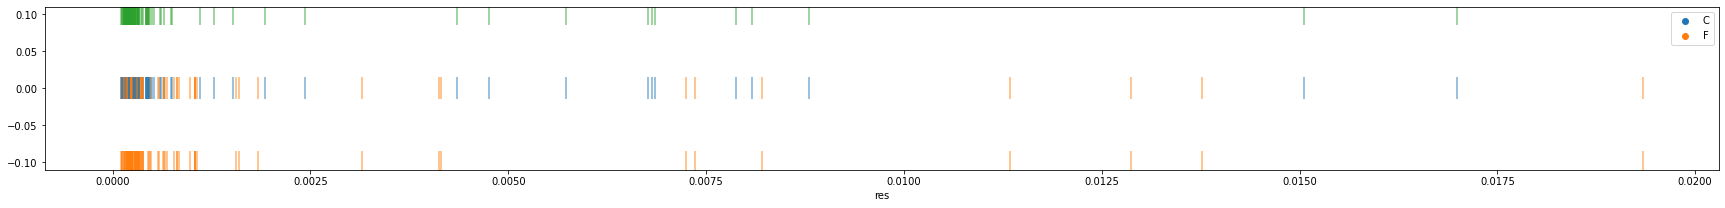

In [ ]:
plt.rcParams["figure.figsize"]=30,3

sns.scatterplot( x =df_result['res'] ,y =0 , hue = df_result['kind'],marker='|',s=500,alpha = 0.5) #Height is not important
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'F'] ,y =-0.1 ,marker='|',s=500,alpha = 0.5)
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'C'] ,y =0.1 ,marker='|',s=500,alpha = 0.5) 

plt.show()

In the above demographic, *y* is not important and is only used to have all three graphs separately in one plot.


First and last one show loss of 500 different correct and fraud data respectively.
The graph in between is overlapped of other two.


As we see the correct data loss are more dense and compressed to the left, while frauds are more sparsed.

(The difference is acutally so slight.)

In [ ]:
batch_size = 1 #One by one

x_test_correct_dl = dt.DataLoader(X_test,batch_size=batch_size)
y_test_correct_dl = dt.DataLoader(y_test,batch_size=batch_size)

x_fraud_dl = dt.DataLoader(X_fraud ,batch_size=batch_size)
y_fraud_dl = dt.DataLoader(y_fraud,batch_size=batch_size)

In [ ]:
del X_test
del y_test
del X_fraud
del y_fraud

In [ ]:
df_result = pd.DataFrame()
df_result['kind'] = [] #F or C
df_result['res'] = []

#To test on equal number of correct and fraud data
cr_dl = iter(x_test_correct_dl)
fr_dl = iter(x_fraud_dl)

for i in range(5_000):
  if i%1000 == 0 :
    print(i)
  df_result = df_result.append({'res':test(next(cr_dl))  , 'kind':'C'} , ignore_index=True)
  df_result = df_result.append({'res':test(next(fr_dl))  , 'kind': 'F'} , ignore_index=True)
  

0
1000
2000
3000
4000


In [ ]:
df_result.head(5)

,kind,res
0,C,0.000509
1,F,0.000210
2,C,0.000241
3,F,0.000223
4,C,0.000244


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

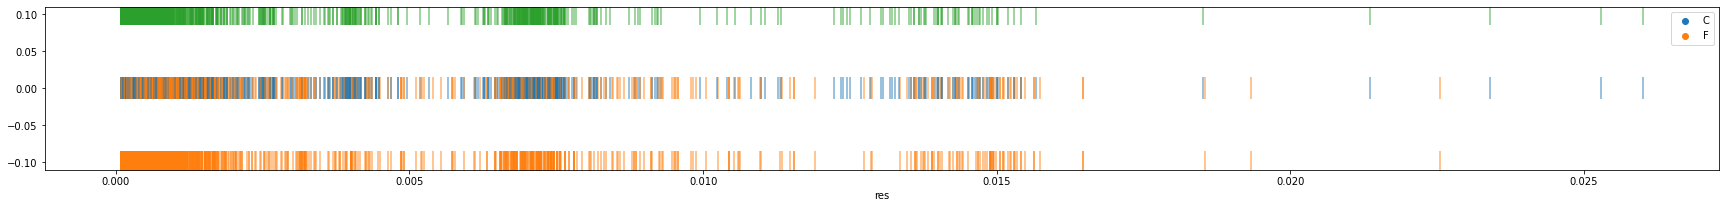

In [ ]:
plt.rcParams["figure.figsize"]=30,3

sns.scatterplot( x =df_result['res'] ,y =0 , hue = df_result['kind'],marker='|',s=500,alpha = 0.5) #Height is not important
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'F'] ,y =-0.1 ,marker='|',s=500,alpha = 0.5)
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'C'] ,y =0.1 ,marker='|',s=500,alpha = 0.5) 

plt.show()

The result is somehow same as last plot.

It seems the seperator can be 0.002.

(It would be better if we created another neural network to predict whether a data loss value comming from autoencoder is for fraud or correct.)



In [ ]:
y_predicts = []
y = []
separator = 0.002

for i in range(len(df_result)):

  if df_result.iloc[i]['kind'] == 'C':
    y.append(0)
  else:
    y.append(1)

  if df_result.iloc[i]['res'] < separator:
    y_predicts.append(0)
  else:
    y_predicts.append(1)
  

In [ ]:
y_predicts[:5]

In [ ]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix( y, y_predicts)
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual Is Fraud'
df_cm.columns.name = 'Predicted Is Fraud'
plt.figure(figsize = (5,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Greens",fmt="d", annot=True,annot_kws={"size": 18})# font size
plt.show()

In [ ]:
 X_corr_valid_dl = dt.DataLoader(X_valid_corr,batch_size=1)
 X_fraud_valid_dl = dt.DataLoader(X_valid_fraud,batch_size=1)

In [ ]:
len(X_corr_valid_dl)

In [ ]:
len(X_fraud_valid_dl)

In [ ]:
df_valid = pd.DataFrame()
df_valid['kind'] = [] #F or C
df_valid['res'] = []

#To test pn equal number of correct and fraud data
cr_valid_dl = iter(X_corr_valid_dl)
fr_valid_dl = iter(X_fraud_valid_dl)

for i in range(1_000):
  df_valid = df_valid.append({'res':test(next(cr_valid_dl))  , 'kind':'C'} , ignore_index=True)
  df_valid = df_valid.append({'res':test(next(fr_valid_dl))  , 'kind': 'F'} , ignore_index=True)
  # if i%1000 == 0:
  #   print(i)

In [ ]:
df_valid.head(20).T

In [ ]:
sns.scatterplot( x =df_valid['res'] ,y =0 , hue = df_valid['kind'],marker = '|',s=500,alpha = 0.5) #Height is not important
sns.scatterplot( x =df_valid['res'][df_valid['kind']=='C'] ,y =0.1 ,marker = '|',s=500,alpha = 1)
sns.scatterplot( x =df_valid['res'][df_valid['kind']=='F'] ,y =-0.1 ,marker = '|',s=500,alpha = 1)
plt.show()

In [ ]:
del fr_valid_dl
del cr_valid_dl
del X_corr_valid_dl
del X_fraud_valid_dl
del df_result

In [ ]:
y_predicts = []
y = []
separator = 0.0025

for i in range(len(df_valid)):

  if df_valid.iloc[i]['kind'] == 'C':
    y.append(0)
  else:
    y.append(1)

  if df_valid.iloc[i]['res'] < separator:
    y_predicts.append(0)
  else:
    y_predicts.append(1)

In [ ]:
y_predicts[:10]

In [ ]:
y[:10]

In [ ]:
#Calculate Accuracy on Validation
correct = 0.0
for i in range(len(y)):
  if y_predicts[i] == y[i]:
    correct = correct +1
print(correct/len(y) , correct)

In [ ]:
data = confusion_matrix( y, y_predicts)
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual Is Fraud'
df_cm.columns.name = 'Predicted Is Fraud'
plt.figure(figsize = (5,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Reds",fmt="d", annot=True,annot_kws={"size": 18})# font size
plt.show()

In [ ]:
del df_valid
del y 
del y_predicts

In [ ]:
torch.save(model.state_dict(), 'weights.pkl')

##Result on Test Set:

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/test_transaction.csv')
df_test_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/test_identity.csv')[['TransactionID','DeviceType']]

In [ ]:
df_test = pd.merge(df_test,df_test_id,on='TransactionID',how='outer')

In [ ]:
df_test.shape

In [ ]:
ID = df_test['TransactionID']

In [ ]:
del df_test_id #make ram free

In [ ]:
df_test.drop(labels=['TransactionID'],axis = 1, inplace=True)

In [ ]:
df_test = pd.get_dummies(df_test)

In [ ]:
for c in df_test.columns:
  if df_test[c].isnull().sum() == len(df_test[c]):
    df_test.drop(labels = [c],axis = 1,inplace = True)
    continue

  df_test[c] = df_test[c].fillna(np.nanmedian(df_test[c]))

In [ ]:
for c in df_test.columns:

  min = df_test[c].min()
  max = df_test[c].max()
  df_test[c] = ((df_test[c]-min)/max).astype('float16')
  if df_test[c].isnull().sum() == len(df_test[c]):
    df_test.drop(labels = [c],axis = 1,inplace = True)

In [ ]:
df_test.shape

In [ ]:
x = torch.unsqueeze(torch.FloatTensor(df_test.values),1)

In [ ]:
x.shape

In [ ]:
ID.isna().sum()

In [ ]:
df_result = pd.DataFrame()
df_result['TransactionID'] = []
df_result['isFraud'] = []

#To test on equal number of correct and fraud data
for i in range(len(ID)):
  df_result =  df_result.append( {'isFraud':test(x[i]), 'TransactionID':ID[i] } , ignore_index=True)
  if i%50_000 == 0:
    print(i)
  

In [ ]:
df_result.head(20)

In [ ]:
res = []
separator
for i in range(len(df_result)):
  if df_result['isFraud'][i] < 0.003:
    res.append(0)
  else:
    res.append(1)

In [ ]:
pd.Series(res).value_counts()

In [ ]:
df_result['TransactionID'] = ID.astype('int32')

In [ ]:
df_result['isFraud'] = res

In [ ]:
pd.Series(df_result['isFraud']).value_counts()

In [ ]:
df_result.shape

In [ ]:
df_result.to_csv('Result.csv',index=False)